***Professor's Code to get total number of users and print details for users.***

In [18]:
import requests
import json

# replace all the "headers" with your github api key

id_ = 0
response = requests.get('https://api.github.com/users?since='+str(id_),headers=headers)
data = response.json()



response = requests.get('use your api key here',headers=headers)
data = response.json()
json_formatted_str = json.dumps(data, indent=2)
print(json_formatted_str)

{
  "total_count": 124478434,
  "incomplete_results": true,
  "items": [
    {
      "login": "Dalnuurshe",
      "id": 154937602,
      "node_id": "U_kgDOCTwpAg",
      "avatar_url": "https://avatars.githubusercontent.com/u/154937602?v=4",
      "gravatar_id": "",
      "url": "https://api.github.com/users/Dalnuurshe",
      "html_url": "https://github.com/Dalnuurshe",
      "followers_url": "https://api.github.com/users/Dalnuurshe/followers",
      "following_url": "https://api.github.com/users/Dalnuurshe/following{/other_user}",
      "gists_url": "https://api.github.com/users/Dalnuurshe/gists{/gist_id}",
      "starred_url": "https://api.github.com/users/Dalnuurshe/starred{/owner}{/repo}",
      "subscriptions_url": "https://api.github.com/users/Dalnuurshe/subscriptions",
      "organizations_url": "https://api.github.com/users/Dalnuurshe/orgs",
      "repos_url": "https://api.github.com/users/Dalnuurshe/repos",
      "events_url": "https://api.github.com/users/Dalnuurshe/events{/p

***My Code for Data Crawling***

In [10]:
import pandas as pd
import numpy as np
import requests
import json
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

***Function definition for getting total users***

In [12]:
# 127618887
def calculate_total(start_id, total_batch):
    batch_current = 0
    data = []
    while batch_current < total_batch:
        string = str(start_id + batch_current)
        response = (requests.get('https://api.github.com/users?since='+string, headers = headers)) # replace the nheader variable eith your api key
        data_response = response.json()
#         print(data_response)
        for i in data_response:
            data.append(i['id'])
        batch_current = data_response[-1]['id'] - start_id
    count = 0
    for j in data:
        count = count + 1
        if start_id + total_batch <= j:
            return data[:count]

***Function definition to calculate average users***

In [13]:
def calculate_average(df):
    avg = df.count(axis = 0).mean()
    return avg

***Bin size of 1000 users in  each bin***

In [14]:
# sample_bins = 140
# total_in_each_bin = 1000
# number_of_bins = int(127618887 / total_in_each_bin)

***Bin size of 5000 users in each bin***

In [15]:
# sample_bins =25
# total_in_each_bin = 5000
# number_of_bins = int(127618887 / total_in_each_bin)

***Bin size of 10000 users in each bin***

In [16]:
sample_bins = 13
total_in_each_bin = 10000
number_of_bins = int(127618887 / total_in_each_bin)

***Creating dataframe using previous bins***

In [17]:
initial_bins = []

for i in range(sample_bins):
    initial_bins.append(randint(1,number_of_bins))

# print(initial_bins)
df_data = []
count = 0
for i in initial_bins:
    i = i * total_in_each_bin
    result = calculate_total(i, total_in_each_bin)
    df_data.append(result)
    count = count + 1
    print(f"done for {count} bins")


sample_users_df = pd.DataFrame(df_data)
sample_users_df = sample_users_df.transpose()

done for 1 bins
done for 2 bins
done for 3 bins
done for 4 bins
done for 5 bins
done for 6 bins
done for 7 bins
done for 8 bins
done for 9 bins
done for 10 bins
done for 11 bins
done for 12 bins
done for 13 bins


In [18]:
sample_users_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,93260001.0,43310001.0,100040001.0,64190001.0,570001.0,12310001.0,66230001.0,94570001.0,86250001.0,101610001.0,5320001.0,97970001.0,104130001.0
1,93260002.0,43310002.0,100040002.0,64190002.0,570002.0,12310002.0,66230002.0,94570003.0,86250002.0,101610002.0,5320002.0,97970002.0,104130002.0
2,93260003.0,43310003.0,100040003.0,64190003.0,570003.0,12310003.0,66230003.0,94570004.0,86250003.0,101610003.0,5320004.0,97970003.0,104130003.0
3,93260004.0,43310004.0,100040004.0,64190004.0,570004.0,12310004.0,66230004.0,94570006.0,86250004.0,101610004.0,5320005.0,97970004.0,104130004.0
4,93260005.0,43310005.0,100040005.0,64190005.0,570005.0,12310006.0,66230005.0,94570007.0,86250005.0,101610005.0,5320006.0,97970005.0,104130005.0


In [19]:
sample_users_df.shape

(9756, 13)

In [20]:
average_count = calculate_average(sample_users_df)
total_approximation = number_of_bins * average_count
print("Total Active Users in Github (Approximate):", total_approximation)
print("Average count for batch of 10k IDs bins:", average_count)

Total Active Users in Github (Approximate): 120147759.84615386
Average count for batch of 10k IDs bins: 9415.23076923077


Text(0.5, 1.0, 'Id counts per bin')

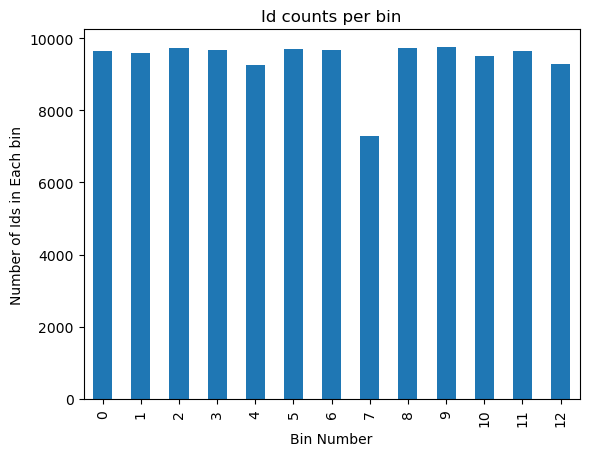

In [21]:
sample_users_df.count().plot(kind='bar')
plt.xlabel('Bin Number')
plt.ylabel('Number of Ids in Each bin')
plt.title('Id counts per bin')

In [ ]:
sample_users_df.to_csv("Data For 10K")